In [1]:
from moseq2_detectron_extract.model.model import MoseqDatasetMapper
import os

from moseq2_detectron_extract.model.config import (add_dataset_cfg,
                                                   get_base_config,
                                                   load_config)
from moseq2_detectron_extract.io.annot import (
    default_keypoint_names,
    get_dataset_statistics, read_annotations, register_dataset_metadata,
    register_datasets, replace_data_path_in_annotations, show_dataset_info,
    validate_annotations)


from albumentations.augmentations.transforms import GaussNoise, RandomFog
from albumentations.augmentations.geometric.transforms import Perspective  
from moseq2_detectron_extract.model.augmentations import Albumentations, DoughnutNoiseAugmentation, RandomFieldNoiseAugmentation, ScaleAugmentation
from detectron2.data.transforms.augmentation_impl import RandomBrightness, RandomContrast, RandomRotation, ResizeScale,FixedSizeCrop
from detectron2.data.transforms import (Augmentation, BlendTransform,
                                        NoOpTransform, Transform, ResizeTransform, TransformList, CropTransform)
from detectron2.data import build_detection_train_loader
import itertools
import matplotlib.pyplot as plt
import numpy as np
from detectron2.data import transforms as T
import random
from PIL import Image


In [2]:
model_dir = r'C:\Users\thackray\git\moseq2-detectron-extract\notebooks\models\2021-09-28_big_model\2021-10-05T13-56_51'
annot_file = [
    "C:\\Users\\thackray\\moseq-detectron-data\\2021-09-15_sci-dataset-big-annotated-keypoints-masks\\project-3-at-2022-02-19-19-24-fe2ed492.json",
    #"C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\result.json",
]
replace_data_path = [
    ("/data/local-files/?d=Moseq-SCI-Detectron/images/", "C:\\Users\\thackray\\moseq-detectron-data\\2021-09-15_sci-dataset-big-annotated-keypoints-masks\\sci-dataset\\images\\"),
    ("images/", "C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\images\\"),
    ("E:\\moseq_raw_data\\unet_testing\\multi-dataset\\from_cluster\\images\\", "C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\images\\")
]
                

cfg = load_config(os.path.join(model_dir, "config.yaml"))
cfg.SOLVER.IMS_PER_BATCH = 12
cfg.DATALOADER.NUM_WORKERS = 0


intensity_scale = 1.0

annotations = []
for anot_f in annot_file:
    annot = read_annotations(anot_f, default_keypoint_names, mask_format=cfg.INPUT.MASK_FORMAT, rescale=intensity_scale)
    annotations.extend(annot)

for search, replace in replace_data_path:
    replace_data_path_in_annotations(annotations, search, replace)

validate_annotations(annotations)
#annotations = augment_annotations_with_rotation(annotations)
print('Dataset information:')
show_dataset_info(annotations)
register_datasets(annotations, default_keypoint_names)

Dataset information:


In [3]:
augs = [
    ScaleAugmentation(0.5, 1.2, 250, 250),
    FixedSizeCrop((250, 250), pad=True, pad_value=0)
    #RandomRotation([0, 360], expand=True, sample_style='range'),
    #RandomBrightness(0.8, 1.2),
    #RandomContrast(0.8, 1.2),
    #Albumentations(GaussNoise()),
    #DoughnutNoiseAugmentation(mu=10, thickness=(0,10), always_apply=True)
    #RandomFieldNoiseAugmentation(mu=10, std_limit=(10.0, 50.0), power=(2.0, 3.0), always_apply=True),
    #Albumentations(Perspective()),
]
loader = build_detection_train_loader(cfg, mapper=MoseqDatasetMapper(cfg, is_train=True, augmentations=augs))

In [4]:
items = list(itertools.islice(loader, 1))[0]

1.0045614778615448
0.729707261985259
0.8652756514702686
0.8940749840096262
0.8933311148837312
0.5522958587279932
0.8539973492943216
0.9335122070500557
0.5122483896150121
0.7191832760391742
0.8150111070032604
0.9334990751233583
0.5593822337350796
0.5377483640293813
0.5545423928430923


C:\Users\thackray\.conda\envs\moseq-detectron\lib\site-packages\detectron2\structures\keypoints.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  keypoints = torch.as_tensor(keypoints, dtype=torch.float32, device=device)


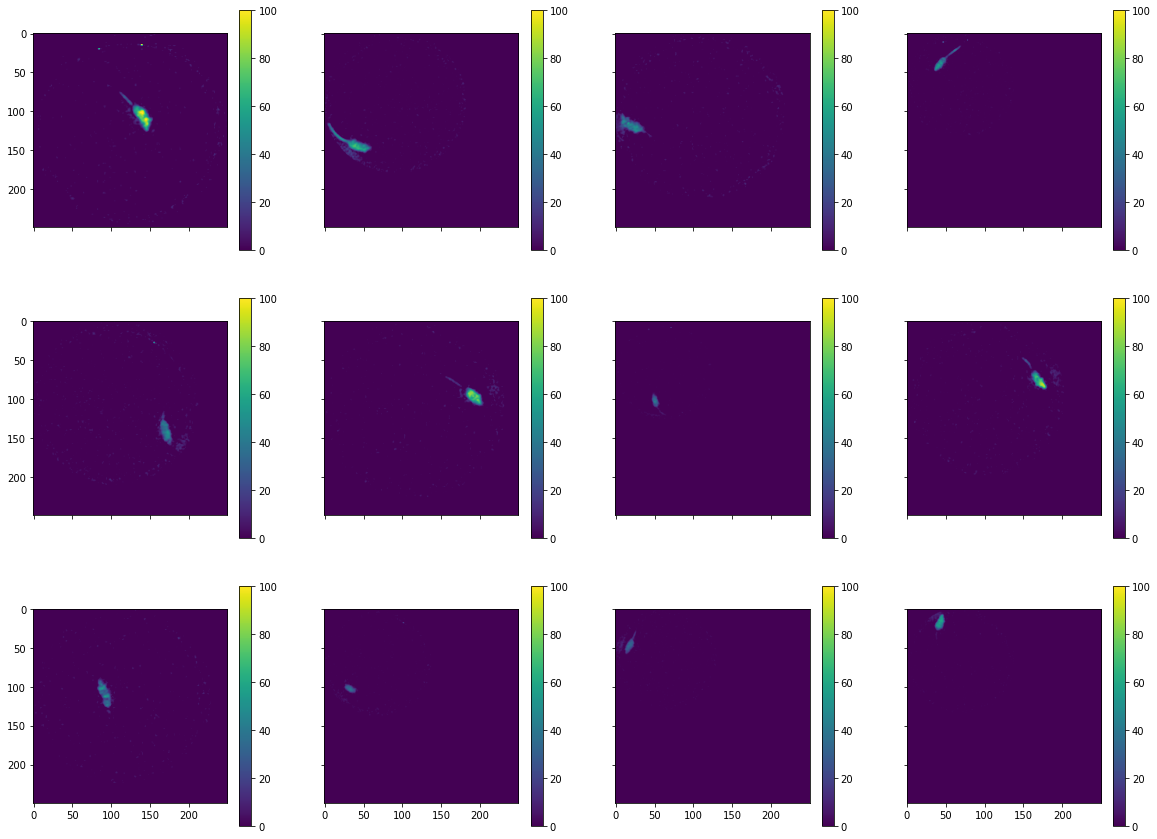

In [6]:
num_images = cfg.SOLVER.IMS_PER_BATCH
vmin = 0
vmax = 100

fig, axs = plt.subplots(3, num_images // 3, figsize=(20,15), sharex=True, sharey=True)
axs = list(itertools.chain(*axs))

for i, data in enumerate(items):
    im = axs[i].imshow(np.squeeze(data['image'].numpy()), vmin=vmin, vmax=vmax)
    plt.colorbar(im, ax=axs[i])


In [9]:
items

[{'file_name': 'C:\\Users\\thackray\\moseq-detectron-data\\2021-09-15_sci-dataset-big-annotated-keypoints-masks\\sci-dataset\\images\\session_20201014132906_depth_8345.png',
  'width': 247,
  'height': 244,
  'image_id': 1620,
  'rescale_intensity': 1.0,
  'image': tensor([[[0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           ...,
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0],
           [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8),
  'instances': Instances(num_instances=1, image_height=386, image_width=391, fields=[gt_boxes: Boxes(tensor([[252.5607,  87.7439, 373.0421, 177.5380]])), gt_classes: tensor([0]), gt_masks: PolygonMasks(num_instances=1), gt_keypoints: Keypoints(num_instances=1)])},
 {'file_name': 'C:\\Users\\thackray\\moseq-detectron-data\\moseq-mask-keypoints-annot\\images\\398.png',
  'width': 248,
  'height': 246,
  'image_id': 749,
  'rescale_intensity': 1.0,
  'image': tensor([[[0, 0,

In [3]:
class DoughnutNoiseAugmentation(T.Augmentation):
    def __init__(self, mu: float=0, var_limit=(10.0, 50.0), thickness=(0, 30), weight=0.5, always_apply=False, p=0.5):
        self.mu = mu
        self.thickness = self.validate_range_arg('thickness', thickness)
        self.var_limit = self.validate_range_arg('var_limit', var_limit)
        self.weight = weight
        self.always_apply = always_apply
        self.p_application = p
        
    def validate_range_arg(self, param_name: str, value):
        if isinstance(value, (tuple, list)):
            if value[0] < 0:
                raise ValueError(f"Lower {param_name} should be non negative.")
            if value[1] < 0:
                raise ValueError(f"Upper {param_name} should be non negative.")
            return value
        elif isinstance(var_limit, (int, float)):
            if value < 0:
                raise ValueError(f"{param_name} should be non negative.")

            return (0, value)
        else:
            raise TypeError(
                "Expected var_limit type to be one of (int, float, tuple[int|float], list[int|float]), got {}".format(type(value))
            )
    
    def get_transform(self, image):
        if (random.random() < self.p_application) or self.always_apply:
            # select random values for some parameters
            thickness = random.uniform(self.thickness[0], self.thickness[1])
            var = random.uniform(self.var_limit[0], self.var_limit[1])
            sigma = var ** 0.5
            random_state = np.random.RandomState(random.randint(0, 2 ** 32 - 1))

            xx, yy = np.mgrid[:image.shape[0], :image.shape[1]]
            r_outer = np.max(image.shape[:2]) // 2
            r_inner = r_outer - thickness
            cx = image.shape[0] // 2
            cy = image.shape[1] // 2
            circle = (xx - cx) ** 2 + (yy - cy) ** 2
            donut = np.logical_and(circle < r_outer ** 2, circle > r_inner ** 2)

            im = np.zeros(shape=image.shape[:2], dtype=float)
            im[donut] = random_state.normal(self.mu, sigma, size=np.count_nonzero(donut))
            return T.BlendTransform(im[:,:,None], self.weight, 1-self.weight)
        else:
            return T.NoOpTransform()

124


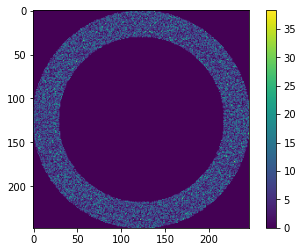

In [61]:

width = 248
height = 246
xx, yy = np.mgrid[:width, :height]
r_outer = width // 2
print(r_outer)
r_inner = r_outer - 30
cx = width // 2
cy = height // 2
circle = (xx - cx) ** 2 + (yy - cy) ** 2
donut = np.logical_and(circle < r_outer ** 2, circle > r_inner ** 2)
        
im = np.zeros(shape=(width, height), dtype=float)
im[donut] = np.abs(np.random.normal(0, 10, size=np.count_nonzero(donut)))
plt.imshow(im)
plt.colorbar()

In [2]:
t = ElasticTransform()

In [3]:
dir(t)

['__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_additional_targets',
 '_get_target_function',
 '_to_dict',
 'add_targets',
 'alpha',
 'alpha_affine',
 'always_apply',
 'applied_in_replay',
 'apply',
 'apply_to_bbox',
 'apply_to_bboxes',
 'apply_to_keypoint',
 'apply_to_keypoints',
 'apply_to_mask',
 'apply_to_masks',
 'apply_with_params',
 'approximate',
 'border_mode',
 'call_backup',
 'deterministic',
 'get_base_init_args',
 'get_class_fullname',
 'get_dict_with_id',
 'get_params',
 'get_params_dependent_on_targets',
 'get_transform_init_args',
 'get_transform_init_args_names',
 'interpolation',
 'is_serializable',
 'mask_value',
 '